In [109]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import random as rand
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [111]:
df = pd.read_csv("car_prices.csv")
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [140]:
df['make'] = df['make'].str.lower()
df['model'] = df['model'].str.lower()

ford_f150_df = df[(df['make'] == 'ford') & (df['model'] == 'f150') | (df['model'] == 'f-150')].copy()

ford_f150_df.reset_index(drop=True, inplace=True)

ford_f150_df.drop(columns=['make', 'model'], inplace=True)

print(ford_f150_df.head())

   year    trim       body transmission                vin state  condition  \
0  2012     XLT  SuperCrew          NaN  1ftew1cm9ckd05952    ca       46.0   
1  2012     FX2  SuperCrew    automatic  1ftfw1ct0cfb64807    ca       46.0   
2  2012     XLT  SuperCrew    automatic  1ftfw1et3ckd61619    ca       39.0   
3  2012     XLT  SuperCrew    automatic  1ftfw1ef9cfc79834    ca       35.0   
4  2012  Lariat   SuperCab    automatic  1ftfx1ef6cfc80260    ca       41.0   

   odometer  color interior                            seller      mmr  \
0   51189.0   gray     gray  ford motor credit company llc pd  19700.0   
1   28687.0   gray    black  ford motor credit company llc pd  26700.0   
2   27465.0  black     gray  ford motor credit company llc pd  26300.0   
3   93858.0  white     gray               aaero sweet company  18900.0   
4   46444.0    red    black  ford motor credit company llc pd  26300.0   

   sellingprice                                 saledate  
0       20200.0  Thu 

In [141]:
def reservoir_sampling(m, data):
  if m > len(data):
        m = len(data)
  rsdata = data.copy()
  reservoirindex = []


  for i in range(m):
    reservoirindex.append(i)
  for i in range(m, len(data)):
    j = rand.randint(0, i-1)
    if (j < m):
      reservoirindex[j] = i

  return rsdata.iloc[reservoirindex]

In [142]:
numerical_df = ford_f150_df.select_dtypes(include=['number'])

sampled_data = reservoir_sampling(14479, numerical_df)

cleaned_df = sampled_data.dropna()

print(cleaned_df.head())

   year  condition  odometer      mmr  sellingprice
0  2012       46.0   51189.0  19700.0       20200.0
1  2012       46.0   28687.0  26700.0       30500.0
2  2012       39.0   27465.0  26300.0       28800.0
3  2012       35.0   93858.0  18900.0       19500.0
4  2012       41.0   46444.0  26300.0       25600.0


In [143]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

numeric_features = ['year', 'condition', 'odometer', 'sellingprice']

for feature in numeric_features:
    cleaned_df.loc[:, feature] = pd.to_numeric(cleaned_df[feature], errors='coerce')
    cleaned_df.loc[:, feature] = cleaned_df[feature].fillna(cleaned_df[feature].mean())

cleaned_df = cleaned_df.replace([np.inf, -np.inf], np.nan)

for feature in numeric_features:
    cleaned_df.loc[:, feature] = cleaned_df[feature].fillna(cleaned_df[feature].mean())


X = cleaned_df[numeric_features].values
y = cleaned_df['mmr'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train_scaled, y_train)

predicted_values = knn.predict(X_test_scaled)

errors = predicted_values - y_test
errors = abs(errors)

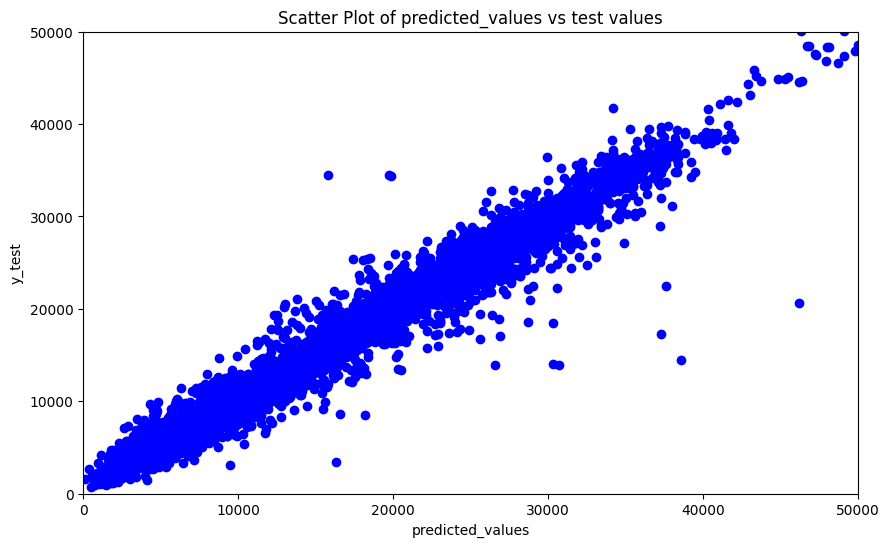

In [144]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_values, color='blue')

plt.xlabel('predicted_values')
plt.ylabel('y_test')
plt.title('Scatter Plot of predicted_values vs test values')

plt.xlim(0, 50000)
plt.ylim(0, 50000)

plt.show()